In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# 1. EDA

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Videos\\FastagFraudDetection.csv")
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [3]:
#shape of data
df.shape

(5000, 13)

In [4]:
#information
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
# check the null values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()  #for numerical features

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [8]:
#descirbe or get the statictistcal description for numerical+categoriecal features
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


#### Observation 1
1. Fastag ID has 549 Null values
2. No Duplicate Entries
3. Data types are almost correct

In [9]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [10]:
#unique values
print("Unique Vehicle Type: ", df['Vehicle_Type'].unique())
print("Unique TollBoothID : ", df['TollBoothID'].unique())
print("Unique Lane Type : ", df['Lane_Type'].unique())
print("Unique Vehicle Dimesnions : ", df['Vehicle_Dimensions'].unique())
print("Unique Fraud Indicator : ", df['Fraud_indicator'].unique())
print("Unique GeogrphicalLocation : ", df['Geographical_Location'].unique())

Unique Vehicle Type:  ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Unique TollBoothID :  ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Unique Lane Type :  ['Express' 'Regular']
Unique Vehicle Dimesnions :  ['Large' 'Small' 'Medium']
Unique Fraud Indicator :  ['Fraud' 'Not Fraud']
Unique GeogrphicalLocation :  ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


# 2. Data Visualisation

In [11]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64


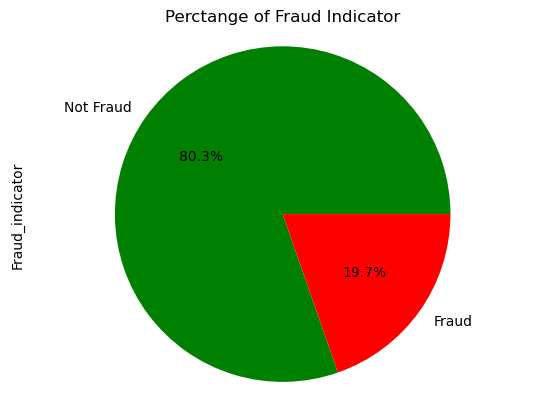

In [12]:
# percentage of fraud and not fraud
print(df['Fraud_indicator'].value_counts())
df['Fraud_indicator'].value_counts().plot(kind='pie',
                                         autopct = '%1.1f%%',
                                         colors = ['green', 'red'])
plt.title("Perctange of Fraud Indicator")
plt.axis('equal')
plt.show()

### 2.1 Analyse diffent Columns

Analysise based on Fruad indicator

In [13]:
df['Vehicle_Type'].value_counts()

Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: Vehicle_Type, dtype: int64

Text(0.5, 1.0, 'Vehicle Type')

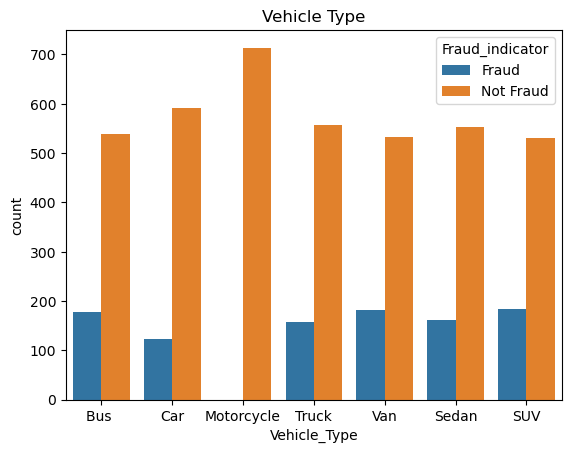

In [14]:
#Vheicle Typs
sns.countplot(x='Vehicle_Type',
              data = df,
              hue='Fraud_indicator').set_title('Vehicle Type')

Text(0.5, 1.0, 'Vehicle Dimensions')

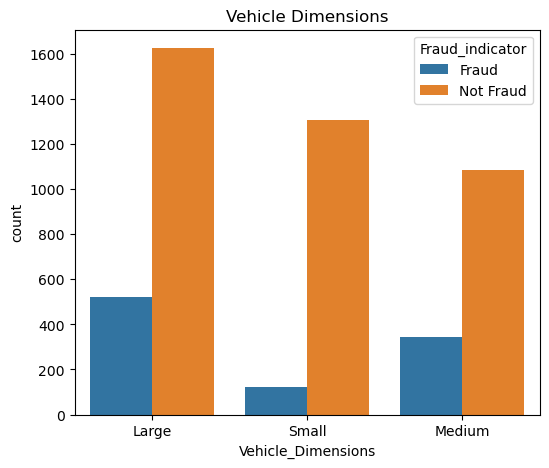

In [15]:
#Vheicle Dimensin
plt.figure(figsize=(6,5))
sns.countplot(x='Vehicle_Dimensions',
              data = df,
              hue='Fraud_indicator').set_title('Vehicle Dimensions')

Text(0.5, 1.0, 'Different Tollbooths')

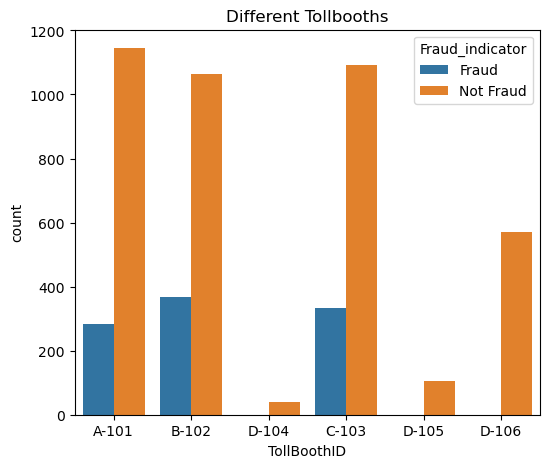

In [16]:
#Different toll booths
plt.figure(figsize=(6,5))
sns.countplot(x='TollBoothID',
              data = df,
              hue='Fraud_indicator').set_title('Different Tollbooths')

Text(0.5, 1.0, 'Different Lanes')

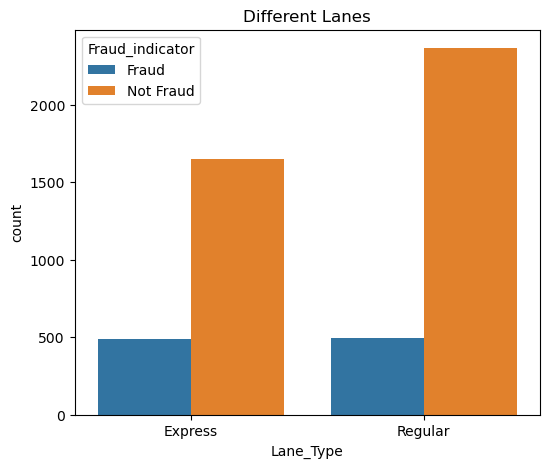

In [17]:
#Lane Type
plt.figure(figsize=(6,5))
sns.countplot(x='Lane_Type',
              data = df,
              hue='Fraud_indicator').set_title('Different Lanes')

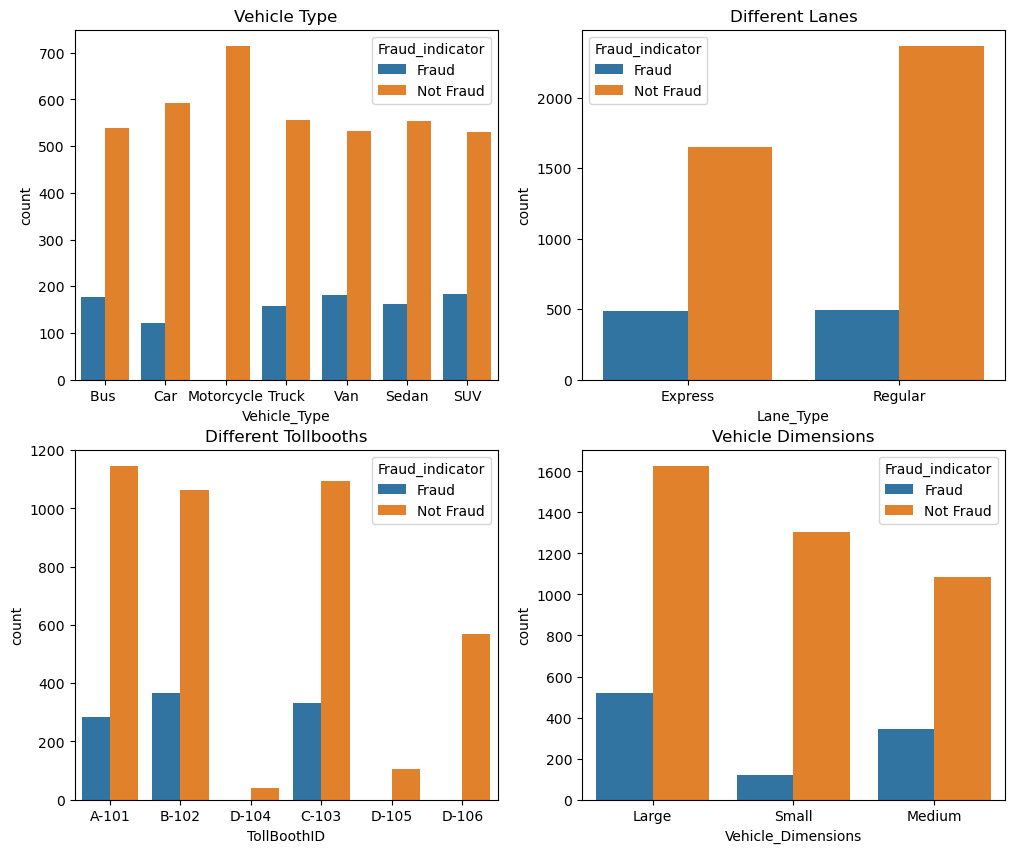

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [18]:
# comibing all graphs together 

fig, axes = plt.subplots(2,2, figsize=(12,10))
#Vheicle Typs
sns.countplot(x='Vehicle_Type',
              data = df,
              hue='Fraud_indicator',
             ax = axes[0,0]).set_title('Vehicle Type')
#Lane Type
plt.figure(figsize=(6,5))
sns.countplot(x='Lane_Type',
              data = df,
              hue='Fraud_indicator',
             ax = axes[0,1]).set_title('Different Lanes')
#Different toll booths
plt.figure(figsize=(6,5))
sns.countplot(x='TollBoothID',
              data = df,
              hue='Fraud_indicator',
             ax = axes[1,0]).set_title('Different Tollbooths')
#Vheicle Dimensin
plt.figure(figsize=(6,5))
sns.countplot(x='Vehicle_Dimensions',
              data = df,
              hue='Fraud_indicator',
             ax = axes[1,1]).set_title('Vehicle Dimensions')


plt.tight_layout()


#### Observation 2
1. Motorcycles are clan - not involved in any fraud
2. Tollbooths 104, 105 and 106 have no fraud detected. But 101,102,103 have mix data
3. Express way has higher fraud percentage based on vehicles than regular ways
4. very less small vehicles are involved in Faud


In [19]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

#### distribution of transaction amount

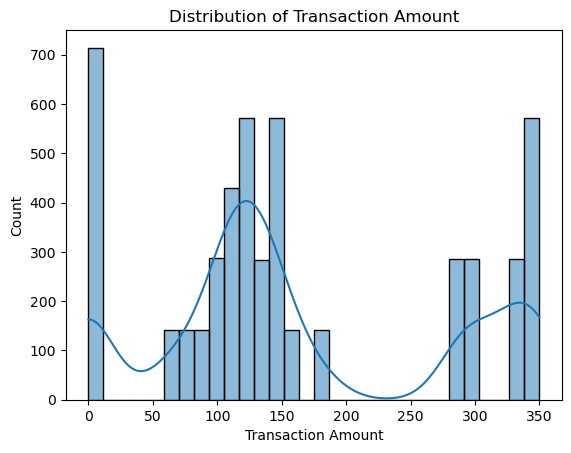

In [20]:
sns.histplot(df['Transaction_Amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel('Transaction Amount')
plt.ylabel ("Count")
plt.show()

#### distribution of paid amount

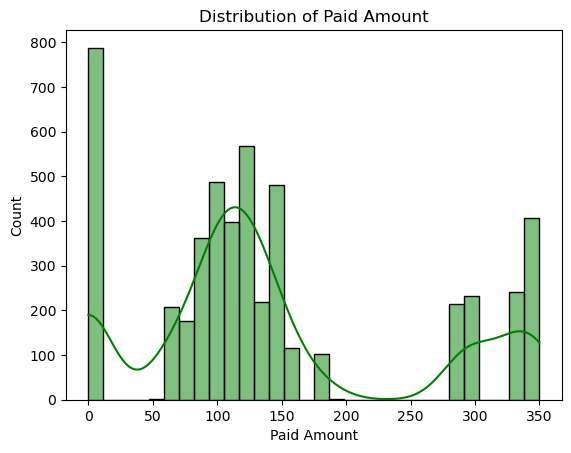

In [21]:
sns.histplot(df['Amount_paid'], bins=30, kde=True, color ='green',edgecolor= 'black')
plt.title("Distribution of Paid Amount")
plt.xlabel('Paid Amount')
plt.ylabel ("Count")
plt.show()

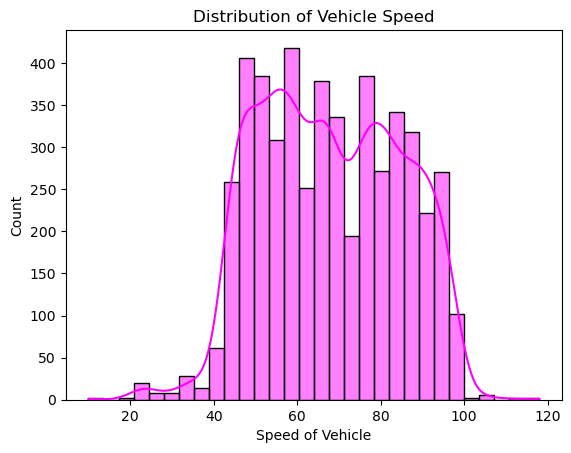

In [22]:

sns.histplot(df['Vehicle_Speed'], bins=30, kde=True, color ='magenta',edgecolor= 'black')
plt.title("Distribution of Vehicle Speed")
plt.xlabel('Speed of Vehicle')
plt.ylabel ("Count")
plt.show()

#### Relationship between tranasaction amount and paid amount

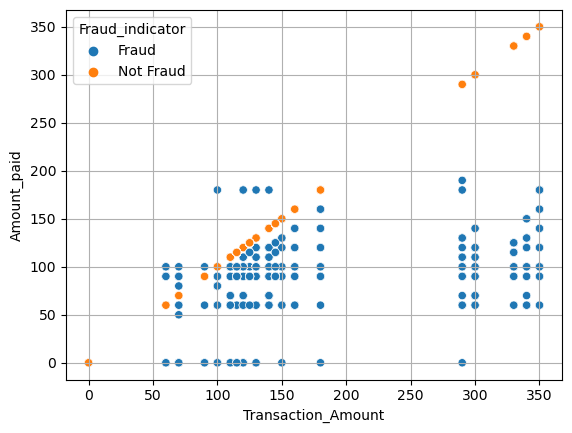

In [23]:
sns.scatterplot(x='Transaction_Amount',
                y = 'Amount_paid',
                hue='Fraud_indicator', data=df)
plt.grid()

### Observation 3
1. When Transaction AMount is not equal to AMount Paid ==> Fraud
2. When Transcation AMount is equal to AMount Paid ==> Not Fraud


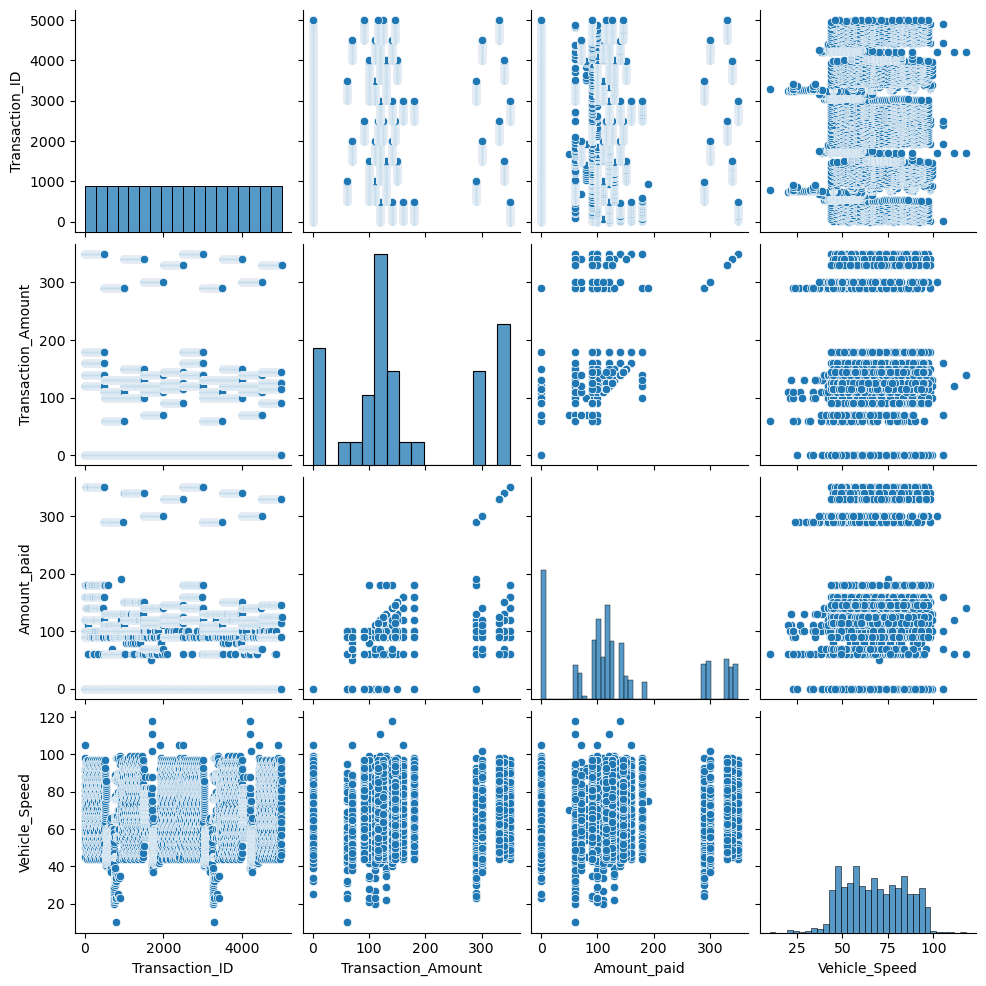

In [24]:
#pair plot
sns.pairplot(df)

## 3. Feature Extraction

In [25]:
df.isnull().sum()


Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [26]:
# df['FastagID'].mode()[0]

In [27]:
df['state_code']= df['Vehicle_Plate_Number'].str[:2]
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,state_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,KA


In [28]:
#remove vehcile number plate feature
df = df.drop('Vehicle_Plate_Number',axis=1)

In [29]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator,state_code
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,KA
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,KA
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,KA
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,KA
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,KA


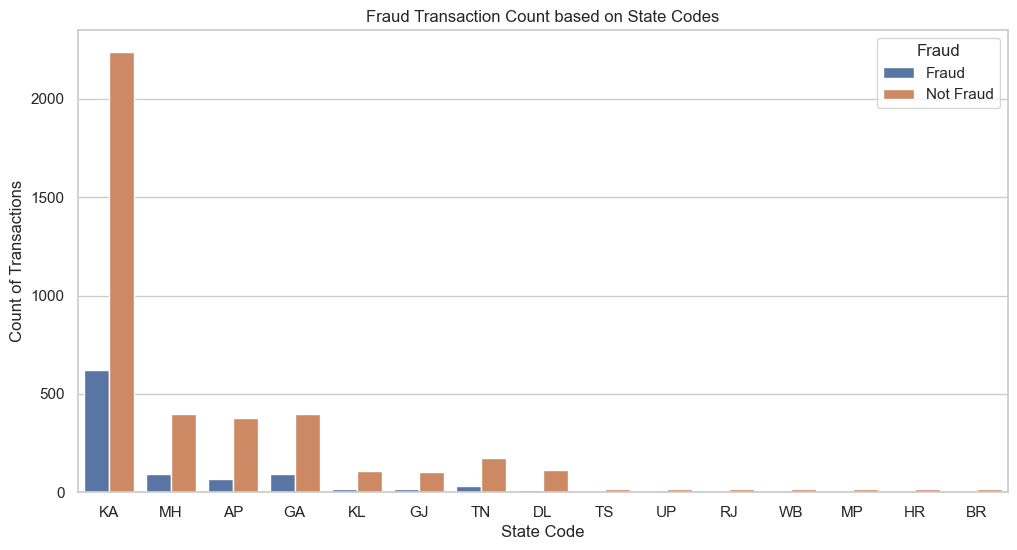

In [30]:
# visulaize fraud based on states
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='state_code',
              data = df,
              hue='Fraud_indicator')
plt.title('Fraud Transaction Count based on State Codes')
plt.xlabel('State Code')
plt.ylabel('Count of Transactions')
plt.legend(title='Fraud')
plt.show()

In [31]:
df['state_code'].value_counts()

KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: state_code, dtype: int64

In [32]:
df.loc[df['Fraud_indicator']=='Fraud', 'state_code'].value_counts()

KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: state_code, dtype: int64

#### Observation 4
1. Highest Fraud count is in Karnataka(KA)

In [33]:
# analysie Timestamp to get the fraud /notfraud based on days
df['Timestamp']

0        1/6/2023 11:20
1        1/7/2023 14:55
2        1/8/2023 18:25
3         1/9/2023 2:05
4        1/10/2023 6:35
             ...       
4995     1/1/2023 22:18
4996    1/17/2023 13:43
4997      2/5/2023 5:08
4998    2/20/2023 20:34
4999     3/10/2023 0:59
Name: Timestamp, Length: 5000, dtype: object

In [34]:
#convert timestamp into dataframe
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [35]:
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

In [36]:
#drop time stamp feature
df = df.drop('Timestamp', axis=1)

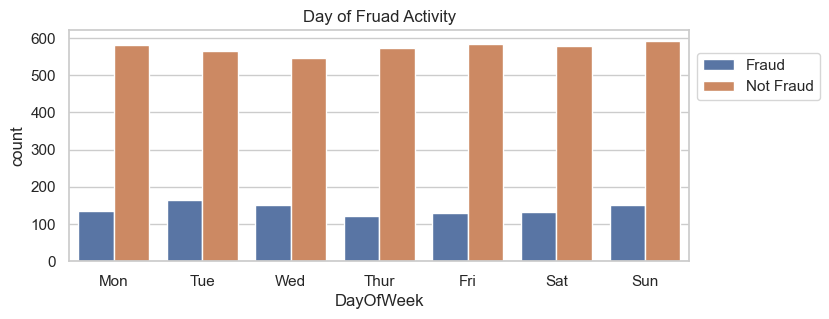

In [37]:
#visualise based on days
plt.figure(figsize=(8,3))
sns.countplot(data = df,
              x='DayOfWeek',
              hue='Fraud_indicator')
plt.title('Day of Fruad Activity')
plt.legend(loc='center left', bbox_to_anchor=(1,0.8))
plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thur','Fri','Sat','Sun'])
plt.show()

#### Correlation Matrix


In [38]:
numericalDf = df.select_dtypes('number')  #only numerical data

In [39]:
corr_matrix = numericalDf.corr()
corr_matrix

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,DayOfWeek,Month
Transaction_ID,1.000000,-0.023515,0.044433,0.014378,-0.023208,0.002446,0.260075
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229,-0.036980,-0.001813,-0.019824
Amount_paid,0.044433,0.870078,1.000000,0.039027,-0.026358,-0.002960,0.018105
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000,-0.002259,-0.017608,0.015349
Hour,-0.023208,-0.036980,-0.026358,-0.002259,1.000000,-0.010292,0.001041
DayOfWeek,0.002446,-0.001813,-0.002960,-0.017608,-0.010292,1.000000,0.002552
Month,0.260075,-0.019824,0.018105,0.015349,0.001041,0.002552,1.000000


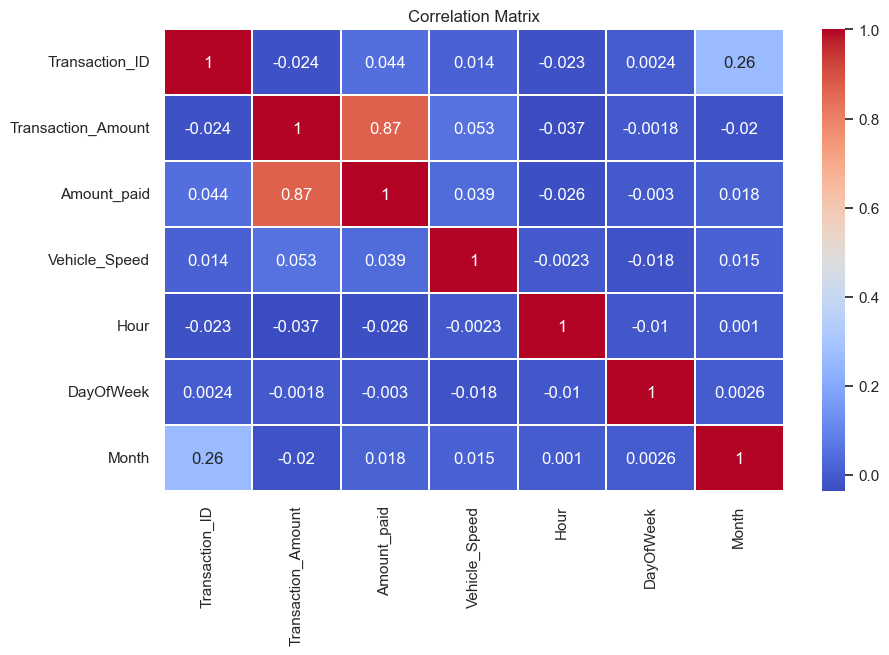

In [40]:
#plot corrrelation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, 
            cmap='coolwarm', annot=True, linewidths=.2)
plt.title("Correlation Matrix")
plt.show()

In [41]:
df.columns

Index(['Transaction_ID', 'Vehicle_Type', 'FastagID', 'TollBoothID',
       'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Fraud_indicator',
       'state_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [42]:
# remove unecessary columns
# df = df.drop(['Transaction_ID','FastagID', 'Geographical_Location'], axis =1)


df.drop(['Transaction_ID','FastagID', 'Geographical_Location'], axis =1, inplace =True)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Type        5000 non-null   object
 1   TollBoothID         5000 non-null   object
 2   Lane_Type           5000 non-null   object
 3   Vehicle_Dimensions  5000 non-null   object
 4   Transaction_Amount  5000 non-null   int64 
 5   Amount_paid         5000 non-null   int64 
 6   Vehicle_Speed       5000 non-null   int64 
 7   Fraud_indicator     5000 non-null   object
 8   state_code          5000 non-null   object
 9   Hour                5000 non-null   int64 
 10  DayOfWeek           5000 non-null   int64 
 11  Month               5000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 468.9+ KB


In [44]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [45]:
df.columns

Index(['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions',
       'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Fraud_indicator',
       'state_code', 'Hour', 'DayOfWeek', 'Month'],
      dtype='object')

In [46]:
objectColumns = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions','TollBoothID','state_code', 'Fraud_indicator' ] #list of object columns
label_encoder = {}
for column in objectColumns:
    le=LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le



In [47]:
df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,state_code,Hour,DayOfWeek,Month
0,0,0,0,0,350,120,65,0,6,11,4,1
1,1,1,1,2,120,100,78,0,6,14,5,1
2,2,3,1,2,0,0,53,1,6,18,6,1
3,5,2,1,0,350,120,92,0,6,2,0,1
4,6,1,0,1,140,100,60,0,6,6,1,1


In [48]:
label_encoder['Fraud_indicator'].classes_

array(['Fraud', 'Not Fraud'], dtype=object)

# Model Training 

In [49]:
X= df.drop(columns=['Fraud_indicator'])
y = df['Fraud_indicator']


In [50]:
# SPlit the x and y in train and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)


X_train:  (3500, 11)
X_test:  (1500, 11)
y_train:  (3500,)
y_test:  (1500,)


### Logistic Regression MODeL

In [52]:
# impor the model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model

LogisticRegression()

In [53]:
# fit the model
lr_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
#predict
y_pred = lr_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

### Model evaluation

In [55]:
# import libraries for matrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [56]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision=precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


print("LR model results: \n")
print("Accuracy: ", accuracy)
print("\nConfusion Matrix\n", conf_matrix)
print("\nPrecision : ", precision)
print("\nRECALL: ", recall)
print("\nF1 Score: ", f1)

LR model results: 

Accuracy:  0.9826666666666667

Confusion Matrix
 [[ 301   26]
 [   0 1173]]

Precision :  0.9783152627189324

RECALL:  1.0

F1 Score:  0.9890387858347386


In [57]:
#classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96       327
           1       0.98      1.00      0.99      1173

    accuracy                           0.98      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [58]:
#function to evaluate model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred)
    precision=precision_score(y_test, y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    
   
    print("Accuracy: ", accuracy)
    print("\nConfusion Matrix\n", conf_matrix)
    print("\nPrecision : ", precision)
    print("\nRECALL: ", recall)
    print("\nF1 Score: ", f1)

In [59]:
# testing all models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


### Decision Tree

In [60]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_tree_pred = tree_model.predict(X_test)
y_tree_pred

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
#Accuacy of Decision Tree
print("Decision Tree Model evaluation: \n")
evaluate_model(y_test, y_tree_pred)

Decision Tree Model evaluation: 

Accuracy:  0.9986666666666667

Confusion Matrix
 [[ 325    2]
 [   0 1173]]

Precision :  0.9982978723404256

RECALL:  1.0

F1 Score:  0.9991482112436115


In [62]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

#accuracy 
print("RANDOM FOREST MODEL EVALUATION: ")
evaluate_model(y_test, rf_y_pred)

RANDOM FOREST MODEL EVALUATION: 
Accuracy:  0.9826666666666667

Confusion Matrix
 [[ 301   26]
 [   0 1173]]

Precision :  0.9783152627189324

RECALL:  1.0

F1 Score:  0.9890387858347386


# Support Vecotr Machine

In [63]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [64]:
svc_y_pred = svc_model.predict(X_test)

#accuracry 
print("SUPPORT VECTOR CLASSIFIER MODEL EVALUATION: ")
evaluate_model(y_test, svc_y_pred)

SUPPORT VECTOR CLASSIFIER MODEL EVALUATION: 
Accuracy:  0.9793333333333333

Confusion Matrix
 [[ 296   31]
 [   0 1173]]

Precision :  0.9742524916943521

RECALL:  1.0

F1 Score:  0.9869583508624316


# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors = 3)
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
knn_y_pred = knnModel.predict(X_test)
#accuracy
print("KNN Classifier MODEL EVALUATION: ")
evaluate_model(y_test, knn_y_pred)

KNN Classifier MODEL EVALUATION: 
Accuracy:  0.9873333333333333

Confusion Matrix
 [[ 308   19]
 [   0 1173]]

Precision :  0.9840604026845637

RECALL:  1.0

F1 Score:  0.9919661733615222


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 1.0, 'COmparison of Accuracy Scores of different models')

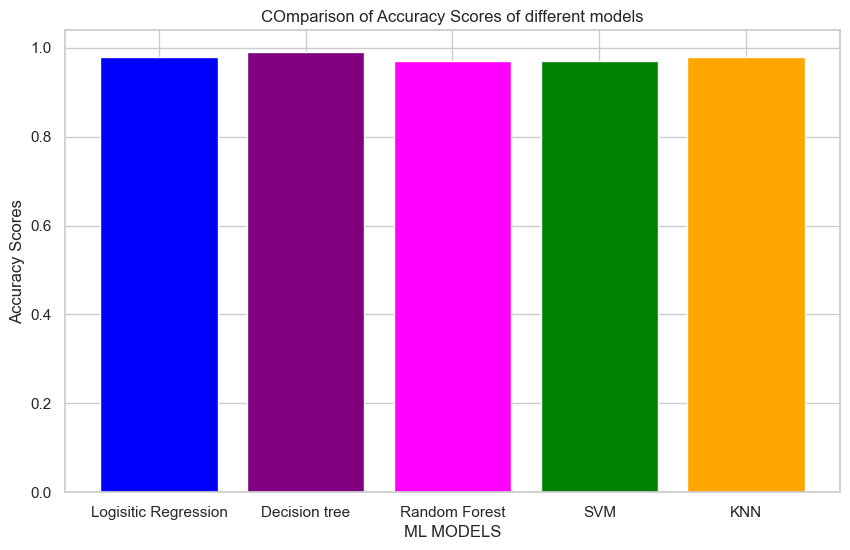

In [67]:
# lets visualsie

models = ['Logisitic Regression', 'Decision tree', 'Random Forest', 'SVM', 'KNN']
accuarcy_scores= [ 0.98,0.99,0.97, 0.97, 0.98]
colors = ['blue', 'purple', 'magenta', 'green','orange']
plt.figure(figsize=(10,6))

plt.bar(models, accuarcy_scores, color = colors)
plt.xlabel("ML MODELS")
plt.ylabel("Accuracy Scores")
plt.title("COmparison of Accuracy Scores of different models")


# Conclusion
1. Decision Tree
   - highest accuracy (99%)
   - overall top performing model


# Additional/Optional Code

here we will use RandomSearch CV to select best params

In [68]:

from sklearn.model_selection import RandomizedSearchCV

In [69]:
rf_params = {"max_depth": [5,8,15,20, None],
             "max_features":[5,6,7,"auto"],
             "min_samples_split": [2,8,15],
             "n_estimators": [100,200,500]}

In [70]:
randomcv_models = [("RF", RandomForestClassifier(), rf_params)
                  ]

In [71]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, 20, None],
   'max_features': [5, 6, 7, 'auto'],
   'min_samples_split': [2, 8, 15],
   'n_estimators': [100, 200, 500]})]

In [72]:
model_params ={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                      param_distributions=params,
                      n_iter = 20,
                      cv = 3,
                      verbose = 2, 
                      n_jobs = 1)
    random.fit(X_train, y_train)
    model_params[name] = random.best_params_
    

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=20, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=20, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=20, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.5s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=15, max_features=7, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimato

In [73]:
model_params

{'RF': {'n_estimators': 100,
  'min_samples_split': 8,
  'max_features': 7,
  'max_depth': 20}}

In [74]:
rf_model_2 = RandomForestClassifier(n_estimators=100,
                                min_samples_split=2,
                                    max_features=7,
                                    max_depth=None)
rf_model_2.fit(X_train,y_train)

RandomForestClassifier(max_features=7)

In [75]:
rf_y_pred2= rf_model_2.predict(X_test)
print("RF MODEL EVALUATION: ")
evaluate_model(y_test, rf_y_pred2)

RF MODEL EVALUATION: 
Accuracy:  0.9966666666666667

Confusion Matrix
 [[ 322    5]
 [   0 1173]]

Precision :  0.9957555178268251

RECALL:  1.0

F1 Score:  0.9978732454274777


RANDOM FOREST MODEL EVALUATION: 

Accuracy:  0.9833333333333333

Confusion Matrix
 [[ 302   25]
 [   0 1173]]

Precision :  0.9791318864774624

RECALL:  1.0

F1 Score:  0.9894559257697174

----------------------------------------------------
**After selecting parameters**

RF MODEL EVALUATION: 
Accuracy:  0.9973333333333333

Confusion Matrix
 [[ 323    4]
 [   0 1173]]

Precision :  0.9966015293118097

RECALL:  1.0

F1 Score:  0.9982978723404256